In [216]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **1 Import libraries and basic metrics**

### **1.1 Import libraries**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler

### **1.2 Loading dataset**

In [218]:
data = pd.read_csv("insurance.csv")
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### **1.3 Basic Metrics**

In [219]:
data.shape

(1338, 8)

**Notes**:

There are 1338 records in the dataset along with 8 columns

In [220]:
# Columns in dataset
data.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

**Notes**:

There are 8 columns in the dataset:

1. index
2. age
3. sex
4. bmi
5. children
6. smoker
7. region
8. charges

In [221]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


**Notes**:

In the dataset, there are 5 numeric datatypes and 3 object datatypes

### **1.4 Null and Duplicate Values** 

In [222]:
# Checking Null values
data.isnull().sum() / len(data) * 100

index       0.0
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

**Notes**:

There are no null values in the dataset

In [223]:
# Checking the duplicate values
data.duplicated().sum()

np.int64(0)

**Notes**:

There are no duplicate records in the dataset

In [224]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### **1.5 Unique Values()**

In [225]:
data.nunique()

index       1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [226]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [227]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [228]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [229]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### **1.6 Datatype Conversion**

In [230]:
data['children'] = data['children'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   index     1338 non-null   int64   
 1   age       1338 non-null   int64   
 2   sex       1338 non-null   object  
 3   bmi       1338 non-null   float64 
 4   children  1338 non-null   category
 5   smoker    1338 non-null   object  
 6   region    1338 non-null   object  
 7   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


**Notes**:

Converted children datatype to category since considering values as numeric is erroneous

## **2 Feature Engineering**

1. Age Groups: Bin age into categories (e.g., 18-24, 25-34, 35-44, etc.)
2. BMI Categories: Classify BMI into underweight, normal, overweight, obese

In [231]:
data.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [232]:
data['age'].min(),data['age'].max(), data['bmi'].min(),data['bmi'].max(),

(np.int64(18), np.int64(64), np.float64(15.96), np.float64(53.13))

In [233]:
age_bins = [17,24,34,44,54,65]
age_labels = ['18-24','25-34','35-44','45-54','55-64']
bmi_bins = [15.5, 24.9, 29.9, 39.9,float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
data['age_group'] = pd.cut(data['age'], bins = age_bins, labels = age_labels)
data['bmi_group'] = pd.cut(data['bmi'], bins = bmi_bins, labels = bmi_labels)


In [234]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,0,19,female,27.900,0,yes,southwest,16884.92400,18-24,normal
1,1,18,male,33.770,1,no,southeast,1725.55230,18-24,overweight
2,2,28,male,33.000,3,no,southeast,4449.46200,25-34,overweight
3,3,33,male,22.705,0,no,northwest,21984.47061,25-34,underweight
4,4,32,male,28.880,0,no,northwest,3866.85520,25-34,normal


## **3 Exploratory Data Analysis**

### **3.1 Statistical Summary**

In [235]:
stat_summ = data.describe(include='all').T.reset_index()
stat_summ

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,index,1338.0,NaN,NaN,NaN,668.5,386.391641,0.0,334.25,668.5,1002.75,1337.0
1,age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
2,sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
4,children,1338.0,6.0,0.0,574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
8,age_group,1338,5,45-54,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bmi_group,1338,4,overweight,623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
# Separating numeric and categorical datatypes
num_cols = data.select_dtypes(include = np.number).columns
cat_cols = data.select_dtypes(include = ['object', 'category']).columns
cat_cols, num_cols

(Index(['sex', 'children', 'smoker', 'region', 'age_group', 'bmi_group'], dtype='object'),
 Index(['index', 'age', 'bmi', 'charges'], dtype='object'))

In [237]:
# Dropping index column
num_cols = num_cols.drop(['index'])
num_cols

Index(['age', 'bmi', 'charges'], dtype='object')

In [238]:
# Categorical COlumns
for col in cat_cols:
    print(f"-------------------{col}-------------------")
    print(f"There are {stat_summ.loc[stat_summ['index'] == col]['count'].values[0]} unique values in {col}")
    print(f"{stat_summ.loc[stat_summ['index'] == col]['top'].values[0]} has highest frequency of {stat_summ.loc[stat_summ['index'] == col]['freq'].values[0]}")
    print("-"*50)

-------------------sex-------------------
There are 1338 unique values in sex
male has highest frequency of 676
--------------------------------------------------
-------------------children-------------------
There are 1338.0 unique values in children
0.0 has highest frequency of 574.0
--------------------------------------------------
-------------------smoker-------------------
There are 1338 unique values in smoker
no has highest frequency of 1064
--------------------------------------------------
-------------------region-------------------
There are 1338 unique values in region
southeast has highest frequency of 364
--------------------------------------------------
-------------------age_group-------------------
There are 1338 unique values in age_group
45-54 has highest frequency of 287
--------------------------------------------------
-------------------bmi_group-------------------
There are 1338 unique values in bmi_group
overweight has highest frequency of 623
-------------

In [239]:
# Numerical Columns
for col in num_cols:
    print(f"-------------------{col}-------------------")
    print(f"Minimum Value: {stat_summ.loc[stat_summ['index'] == col]['min'].values[0]}")
    print(f"Maximum Value: {stat_summ.loc[stat_summ['index'] == col]['max'].values[0]}")
    print(f"Mean Value: {stat_summ.loc[stat_summ['index'] == col]['mean'].values[0]:.2f}")
    print(f"Median Value: {stat_summ.loc[stat_summ['index'] == col]['50%'].values[0]}")
    print(f"25th Percentile Value: {stat_summ.loc[stat_summ['index'] == col]['25%'].values[0]}")
    print(f"75th Percentile Value: {stat_summ.loc[stat_summ['index'] == col]['75%'].values[0]}")
    print("-"*50)
num_cols

-------------------age-------------------
Minimum Value: 18.0
Maximum Value: 64.0
Mean Value: 39.21
Median Value: 39.0
25th Percentile Value: 27.0
75th Percentile Value: 51.0
--------------------------------------------------
-------------------bmi-------------------
Minimum Value: 15.96
Maximum Value: 53.13
Mean Value: 30.66
Median Value: 30.4
25th Percentile Value: 26.29625
75th Percentile Value: 34.69375
--------------------------------------------------
-------------------charges-------------------
Minimum Value: 1121.8739
Maximum Value: 63770.42801
Mean Value: 13270.42
Median Value: 9382.033
25th Percentile Value: 4740.28715
75th Percentile Value: 16639.912515
--------------------------------------------------


Index(['age', 'bmi', 'charges'], dtype='object')

### **3.2 Univariate Analysis - Numeric Columns**

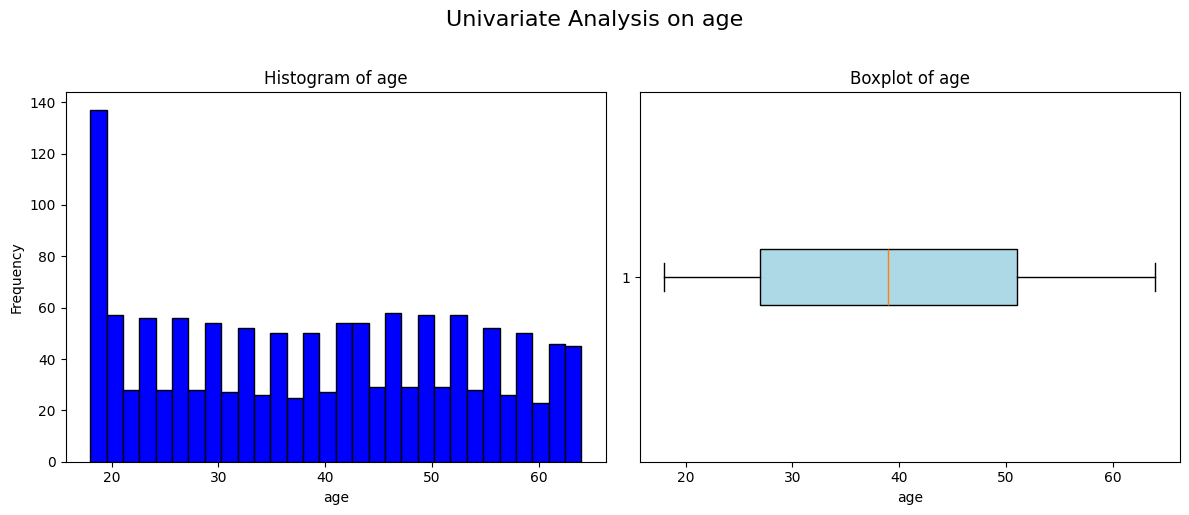

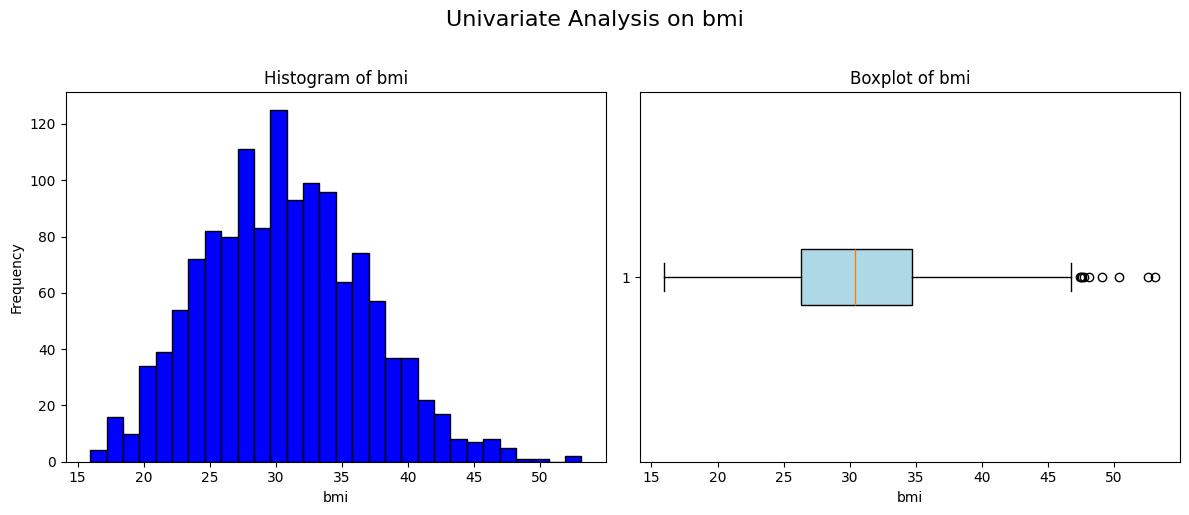

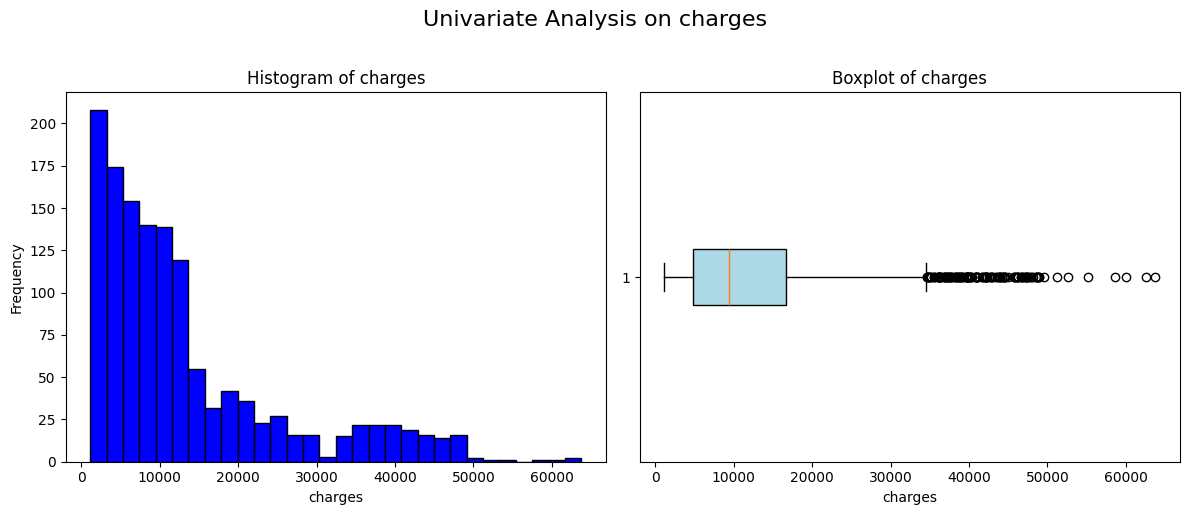

In [240]:
import matplotlib.pyplot as plt

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create two subplots side-by-side

    # Plot Histogram
    axes[0].hist(data[col], bins=30, color='blue', edgecolor='black')
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Plot Boxplot
    axes[1].boxplot(data[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    # Overall layout adjustment
    fig.suptitle(f"Univariate Analysis on {col}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()



### **3.3 Univariate Analysis on Categorical Columns**

In [241]:
cat_cols

Index(['sex', 'children', 'smoker', 'region', 'age_group', 'bmi_group'], dtype='object')

/tmp/ipykernel_3548864/1649415554.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/1649415554.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




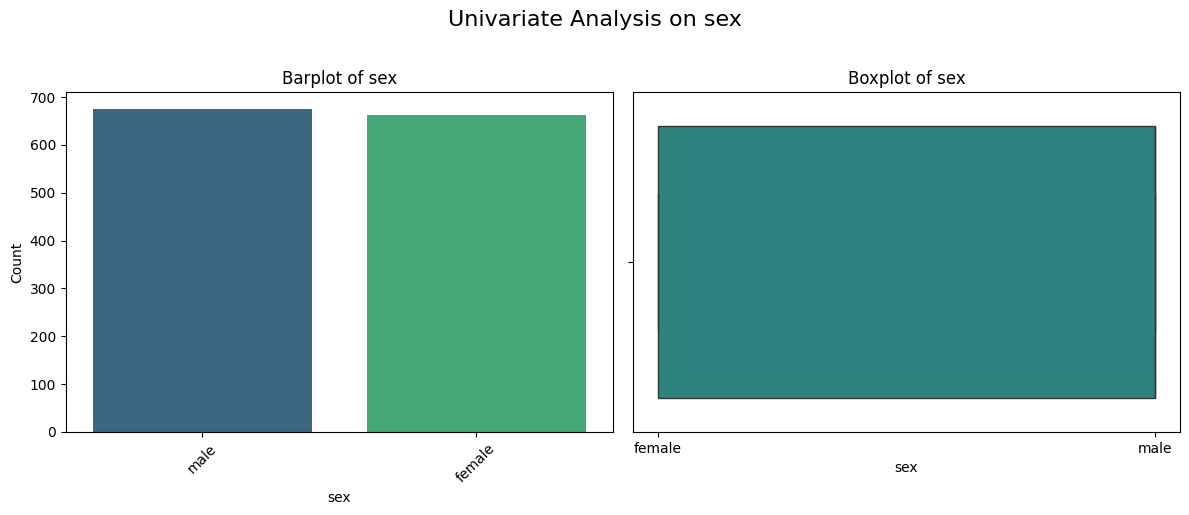

/tmp/ipykernel_3548864/1649415554.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/1649415554.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




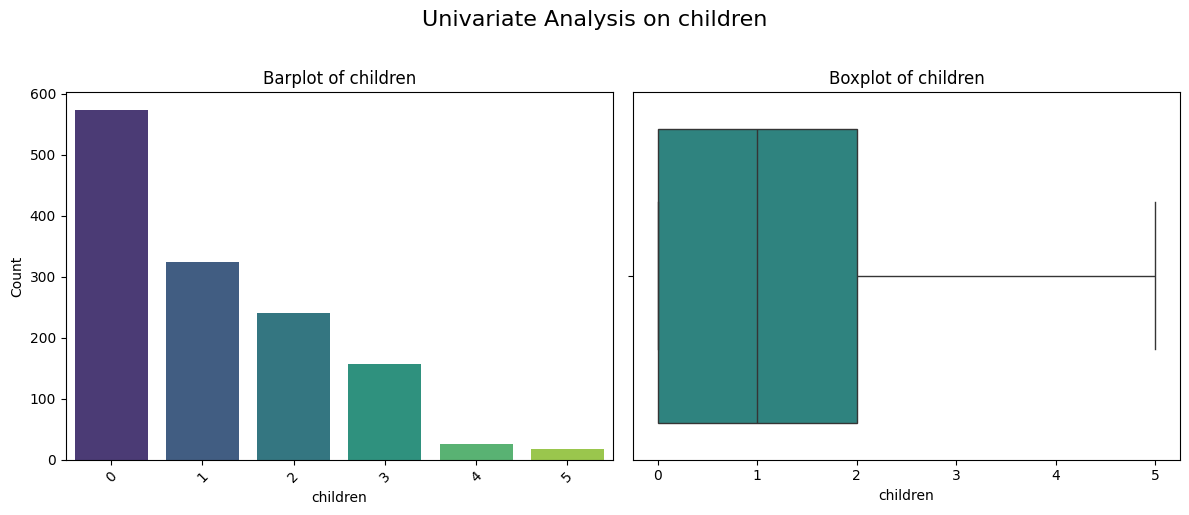

/tmp/ipykernel_3548864/1649415554.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/1649415554.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




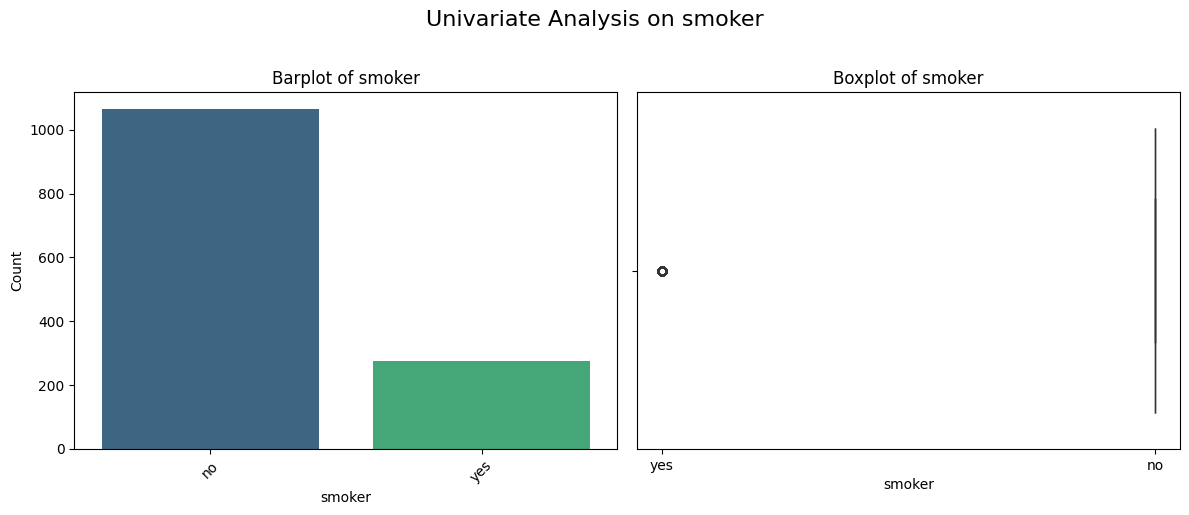

/tmp/ipykernel_3548864/1649415554.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/1649415554.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




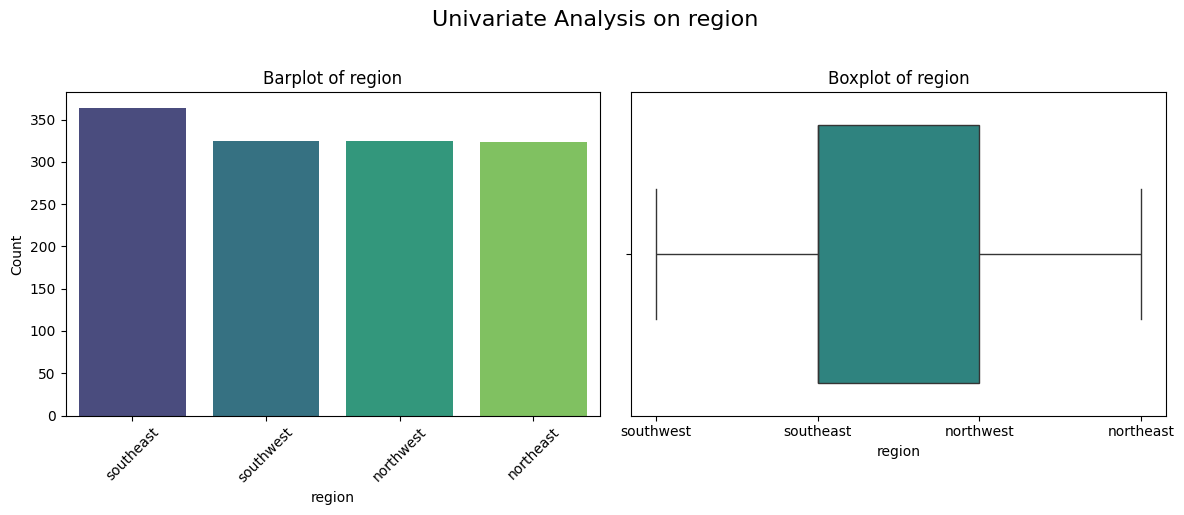

/tmp/ipykernel_3548864/1649415554.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/1649415554.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




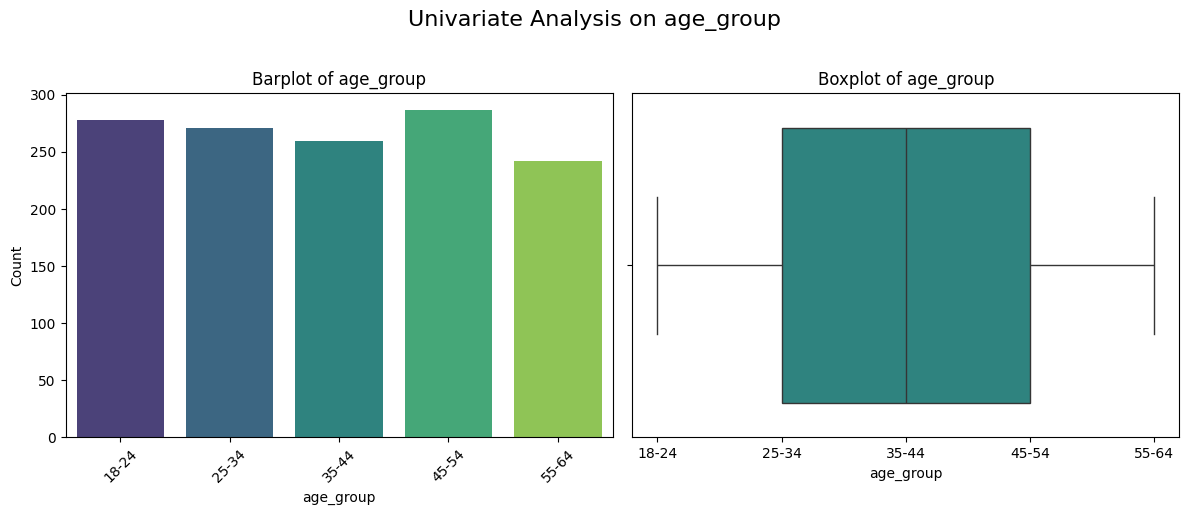

/tmp/ipykernel_3548864/1649415554.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/1649415554.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




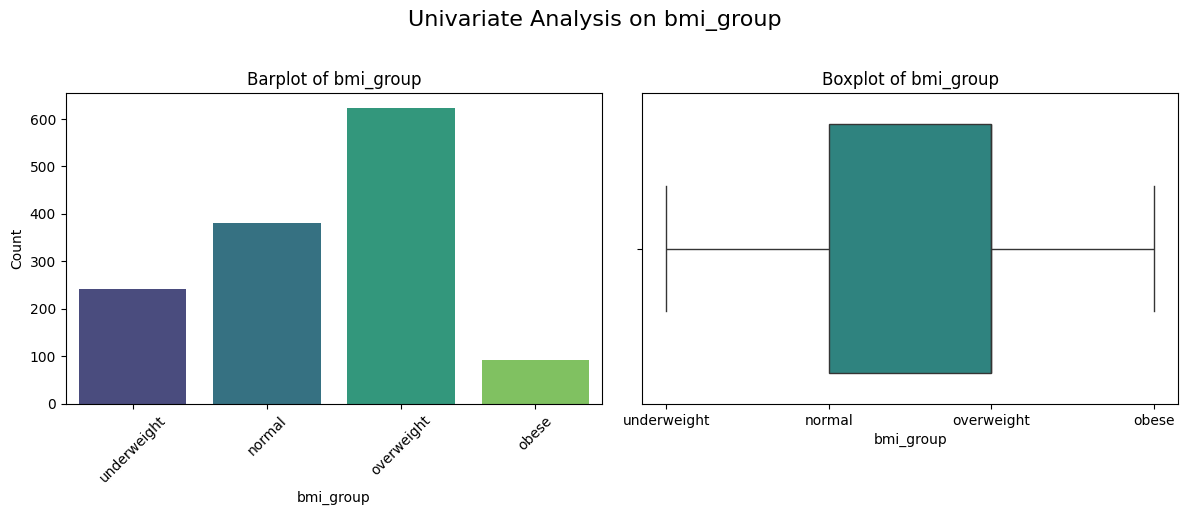

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create two subplots side-by-side

    # Bar Plot
    value_counts = data[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0], palette="viridis")
    axes[0].set_title(f"Barplot of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Box Plot
    sns.boxplot(x=data[col], y=None, ax=axes[1], palette="viridis")
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    # Adjust layout and show the plot
    fig.suptitle(f"Univariate Analysis on {col}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


**Notes**:

* Age:

> By observing age histogram, there are more records with age between 18 and 20. \
> Also, there are no outliers with age

* BMI:

> BMI almost follows Normal distribution with peak at 30. \
> There are few outliers with BMI

* Charges:

> By looking at histogram, many records are having charges less than 15K\
> Also, there are many outliers with charges

* Sex:

> By looking at the barplot, we can see that male and female are equally distributed

* Children:

> By looking at the barplot of children, out of all categories, 0 children has highest number of records, followed by 1 children\
> There are no outliers with Children

* Smoker:

> By looking at the barplot of Smoker, no smoker records are more compared to smoker records\
> There are no outliers with smoker

* Region:

> Southeast has slightly more records compared to other regions like southwest, northeast and northwest.\
> There are no outliers with region 

* Age Group:

> By looking at the barplot of Age group, age group of 45-54 has slightly more records compared to 18-24.\
> There are no outliers with Age Group 

* BMI Group:

> By looking at the barplot of BMI Group, overweight has more records followed by normal\
> There are no outliers

### **3.4 Bivariate Analysis on Numeric Analysis**

**3.4.1 Pairplot of numeric variables**

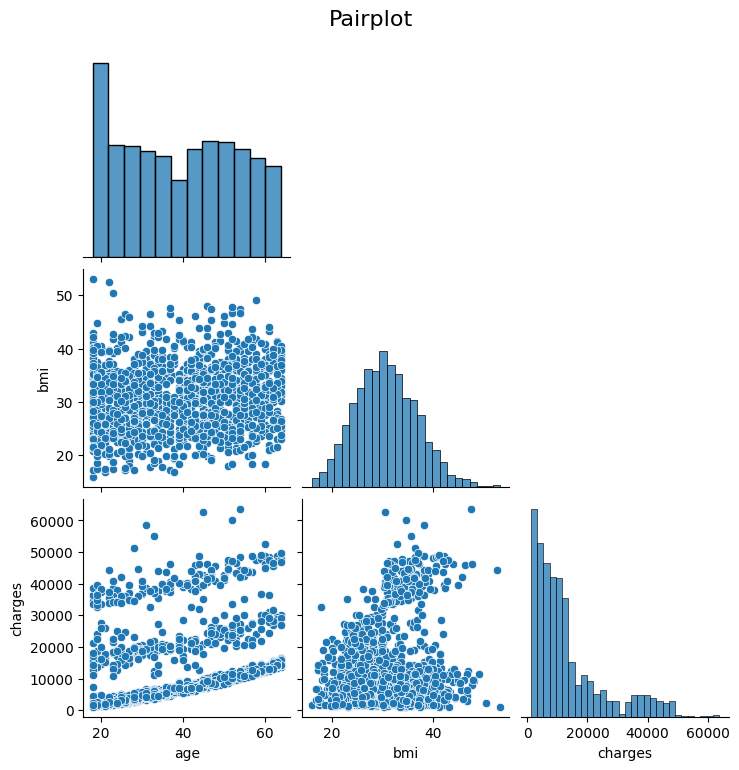

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for numerical columns
sns.pairplot(data[num_cols], diag_kind='hist', corner=True)

# Set overall title and adjust layout
plt.suptitle("Pairplot", y=1.02, fontsize=16)
plt.show()


### **3.5 Categorical vs Numerical Features**

**3.5.1 Sex vs Charges**

/tmp/ipykernel_3548864/3607613977.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3548864/3607613977.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




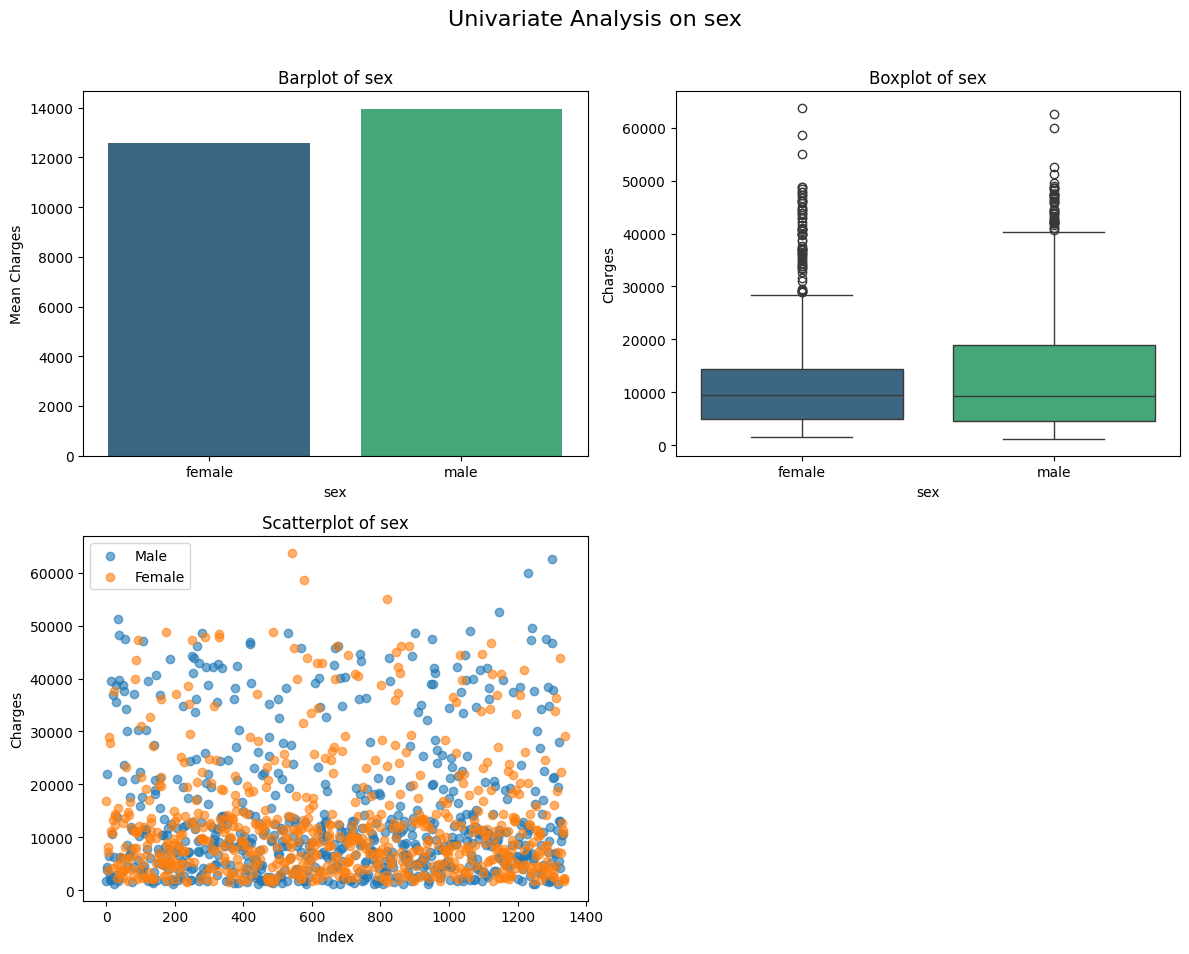

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "sex"

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(f"Univariate Analysis on {col}", fontsize=16, y=0.95)

# Barplot: Mean charges by sex
charges_mean = data.groupby(col)['charges'].mean()
sns.barplot(x=charges_mean.index, y=charges_mean.values, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title(f"Barplot of {col}")
axes[0, 0].set_ylabel("Mean Charges")
axes[0, 0].set_xlabel(col)

# Boxplot: Charges by sex
sns.boxplot(x=data[col], y=data['charges'], ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title(f"Boxplot of {col}")
axes[0, 1].set_xlabel(col)
axes[0, 1].set_ylabel("Charges")

# Scatterplot: Charges for males and females
male_charges = data.loc[data[col] == 'male']['charges']
female_charges = data.loc[data[col] == 'female']['charges']

axes[1, 0].scatter(male_charges.index, male_charges.values, label='Male', alpha=0.6)
axes[1, 0].scatter(female_charges.index, female_charges.values, label='Female', alpha=0.6)
axes[1, 0].set_title(f"Scatterplot of {col}")
axes[1, 0].set_xlabel("Index")
axes[1, 0].set_ylabel("Charges")
axes[1, 0].legend()

# Turn off the unused subplot
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.94])  # Leave space for the title
plt.show()


**3.5.2 Children vs Charges**

In [ ]:
col = "children"
fig = make_subplots(rows = 2, cols = 2, subplot_titles = [f"Barplot of {col}", f"Boxplot of {col}", f"Scatterplot of {col}"])
fig.add_trace(go.Bar(x = data.groupby(col)['charges'].mean().index, y = data.groupby(col)['charges'].mean().values, name = f"{col}", showlegend = False), row = 1, col = 1)
fig.add_trace(go.Box(x = data[col], y = data['charges'], name = f"{col}", showlegend = False), row = 1, col = 2)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 0]['charges'], name = "0 children", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 1]['charges'], name = "1 children", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 2]['charges'], name = "2 children", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 3]['charges'], name = "3 children", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 4]['charges'], name = "4 children", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 5]['charges'], name = "5 children", mode = 'markers', showlegend = True), row = 2, col = 1)

fig.update_layout(title = {'text': f"Univariate Analysis on {col}", 'xanchor': 'center', 'x': 0.5 }, legend = dict(x = 1, y = 0, xanchor='right', yanchor='bottom'),width = 1250, height = 750)
fig.show()

**3.5.3 Smoker vs Charges**

In [ ]:
col = "smoker"
fig = make_subplots(rows = 2, cols = 2, subplot_titles = [f"Barplot of {col}", f"Boxplot of {col}", f"Scatterplot of {col}"])
fig.add_trace(go.Bar(x = data.groupby(col)['charges'].mean().index, y = data.groupby(col)['charges'].mean().values, name = f"{col}", showlegend = False), row = 1, col = 1)
fig.add_trace(go.Box(x = data[col], y = data['charges'], name = f"{col}", showlegend = False), row = 1, col = 2)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'yes']['charges'], name = "smoker", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'no']['charges'], name = "non smoker", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.update_layout(title = {'text': f"Univariate Analysis on {col}", 'xanchor': 'center', 'x': 0.5 }, legend = dict(x = 1, y = 0, xanchor='right', yanchor='bottom'),width = 1250, height = 750)
fig.show()

**3.5.4 Region vs Charges**

In [ ]:
col = "region"
fig = make_subplots(rows = 2, cols = 2, subplot_titles = [f"Barplot of {col}", f"Boxplot of {col}", f"Scatterplot of {col}"])
fig.add_trace(go.Bar(x = data.groupby(col)['charges'].mean().index, y = data.groupby(col)['charges'].mean().values, name = f"{col}", showlegend = False), row = 1, col = 1)
fig.add_trace(go.Box(x = data[col], y = data['charges'], name = f"{col}", showlegend = False), row = 1, col = 2)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'northeast']['charges'], name = "North East", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'northwest']['charges'], name = "North West", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'southeast']['charges'], name = "South East", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'southwest']['charges'], name = "South West", mode = 'markers', showlegend = True), row = 2, col = 1)

fig.update_layout(title = {'text': f"Univariate Analysis on {col}", 'xanchor': 'center', 'x': 0.5 }, legend = dict(x = 1, y = 0, xanchor='right', yanchor='bottom'),width = 1250, height = 750)
fig.show()

**3.5.5 age_group vs Charges**

In [ ]:
col = "age_group"
fig = make_subplots(rows = 2, cols = 2, subplot_titles = [f"Barplot of {col}", f"Boxplot of {col}", f"Scatterplot of {col}"])
fig.add_trace(go.Bar(x = data.groupby(col)['charges'].mean().index, y = data.groupby(col)['charges'].mean().values, name = f"{col}", showlegend = False), row = 1, col = 1)
fig.add_trace(go.Box(x = data[col], y = data['charges'], name = f"{col}", showlegend = False), row = 1, col = 2)
fig.add_trace(go.Scatter( x = data.loc[data[col] == '18-24']['charges'], name = "18-24", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == '25-34']['charges'], name = "25-34", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == '35-44']['charges'], name = "35-44", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == '45-54']['charges'], name = "45-54", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == '55-64']['charges'], name = "55-64", mode = 'markers', showlegend = True), row = 2, col = 1)

fig.update_layout(title = {'text': f"Univariate Analysis on {col}", 'xanchor': 'center', 'x': 0.5 }, legend = dict(x = 1, y = 0, xanchor='right', yanchor='bottom'),width = 1250, height = 750)
fig.show()

**3.5.6 BMI Group vs Charges**

In [ ]:
col = "bmi_group"
fig = make_subplots(rows = 2, cols = 2, subplot_titles = [f"Barplot of {col}", f"Boxplot of {col}", f"Scatterplot of {col}"])
fig.add_trace(go.Bar(x = data.groupby(col)['charges'].mean().index, y = data.groupby(col)['charges'].mean().values, name = f"{col}", showlegend = False), row = 1, col = 1)
fig.add_trace(go.Box(x = data[col], y = data['charges'], name = f"{col}", showlegend = False), row = 1, col = 2)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'underweight']['charges'], name = "underweight", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'normal']['charges'], name = "normal", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'overweight']['charges'], name = "overweight", mode = 'markers', showlegend = True), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.loc[data[col] == 'obese']['charges'], name = "obese", mode = 'markers', showlegend = True), row = 2, col = 1)

fig.update_layout(title = {'text': f"Univariate Analysis on {col}", 'xanchor': 'center', 'x': 0.5 }, legend = dict(x = 1, y = 0, xanchor='right', yanchor='bottom'),width = 1250, height = 750)
fig.show()

**Notes**:

* Sex vs Charges:

> By observing the barplot and boxplot of Sex vs Charges, male insured has slightly more charges compared to female.\
> We can see outliers in both male and female

* Children vs Charges:

> By observing the plots, we can see charges are slightly high with insured with 2 children and 3 children, compared to others\
> We can see outliers in almost all categories

* Smoker vs Charges:

> By observing the plots, we can see charges for non smokers is less compared to smokers. \
> Charges for non smoker is less than 15k

* Region vs Charges:

> By observing the plots, we can see southeast has slightly more charges compared to rest of the regions\
> We can see there are outliers in almost all regions\
> Scatterplot has less inference

* age_group vs Charges:

> By observing the age group, charges are increasing with age group with highest for 55-64 group\
> We can see there are outliers in all age groups

* bmi group vs Charges:

> Overall underweight has less charges and obese has high charges with increasing trend from underweight, normal, overweight and obese\
> We can see outliers in all bmi groups

### **3.6 Heatmap**

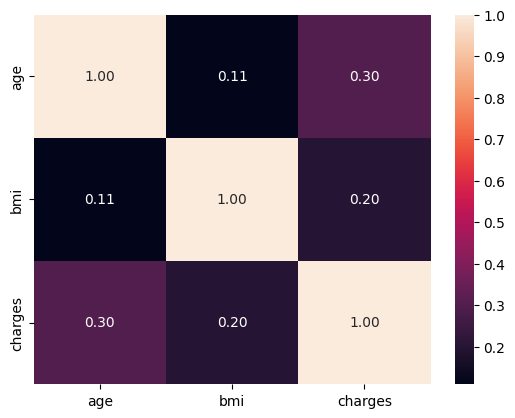

In [248]:
sns.heatmap(data[num_cols].corr(), annot = True, fmt = ".2f")
plt.show()

## **4 Handling Missing values & outliers**

In [249]:
data.isnull().sum()

index        0
age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
bmi_group    0
dtype: int64

**Notes**:

    There are no missing values

## **5 Normalization and Standardization**

In [250]:
data.head(10)

,index,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,0,19,female,27.900,0,yes,southwest,16884.92400,18-24,normal
1,1,18,male,33.770,1,no,southeast,1725.55230,18-24,overweight
2,2,28,male,33.000,3,no,southeast,4449.46200,25-34,overweight
3,3,33,male,22.705,0,no,northwest,21984.47061,25-34,underweight
4,4,32,male,28.880,0,no,northwest,3866.85520,25-34,normal
5,5,31,female,25.740,0,no,southeast,3756.62160,25-34,normal
6,6,46,female,33.440,1,no,southeast,8240.58960,45-54,overweight
7,7,37,female,27.740,3,no,northwest,7281.50560,35-44,normal
8,8,37,male,29.830,2,no,northeast,6406.41070,35-44,normal
9,9,60,female,25.840,0,no,northwest,28923.13692,55-64,normal


**Notes**:

Since there are only 2 numerical features we need to deal with, we are skipping normalization for now.

## **6 Hypothesis Testing**

### **6.1 Check if BMI is normally distributed**

**Using Shapiro-Wilk Test**:

    Setup Null and Alternate Hypothesis
    Perform Shapiro-Wilk test and compute p-value
    Compare p_value with significance level

**STEP 1): Setup Null and Alternate Hypothesis**

    Null Hypothesis (H0): Data is normally distributed
    Alternate Hypothesis (Ha) : Data is not normally distributed



**STEP 2): Perform Shapiro-Wilk test and compute p-value**


In [251]:
np.random.sample(40)
bmi_subset = data['bmi'].sample(200)
bmi_test_stat, bmi_p_value = stats.shapiro(bmi_subset)
print(f"Test Statistics for BMI: {bmi_test_stat} and P-Value for BMI: {bmi_p_value}")

Test Statistics for BMI: 0.9742855923826175 and P-Value for BMI: 0.0009891606431825088


**STEP 3): Compare P_Value with Significance Level**

Assume significance level as 5%

In [252]:
alpha = 0.05
# Comparision of p_value with significance for bmi
if bmi_p_value < alpha:
    print("Reject Null Hypothesis(H0) for BMI data. BMI data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for BMI data. BMI data is normally distributed")

Reject Null Hypothesis(H0) for BMI data. BMI data is not normally distributed.


**Using QQ Plots**

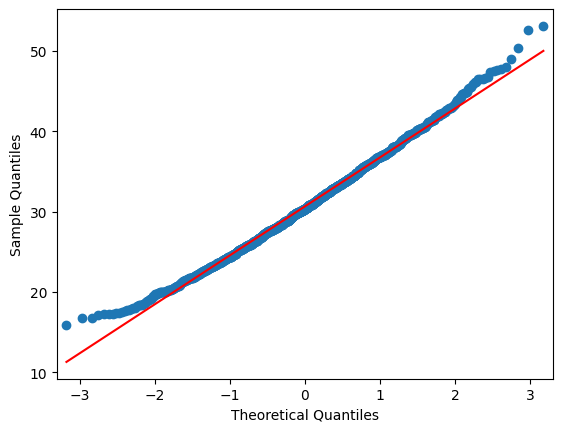

In [253]:
qqplot(data['bmi'], line = 's')
plt.show()

**Notes**:

BMI is normally distributed

### **6.2 Checking if male and female have equal distribution wrt to Charges**

In [254]:
male_charges = data.loc[data['sex'] == 'male']['charges']
female_charges = data.loc[data['sex'] == 'female']['charges']

**Assumptions of T-Test**:

   1. Normality -> Data should be normally distributed
   2. Homogeneity of Variance -> Two sample variance should match
   3. Independence of Observations -> Observations should be independence of each other
   4. Continuous Data





**6.2.1 Normality**

**Using Shapiro-Wilk Test**:

* Setup Null and Alternate Hypothesis
* Perform Shapiro-Wilk test and compute p-value
* Compare p_value with significance level

**STEP 1): Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Data is normally distributed
* Alternate Hypothesis (Ha) : Data is not normally distributed

**STEP 2): Perform Shapiro-Wilk test and compute p-value**


In [255]:
male_charges_subset = male_charges.sample(200)
female_charges_subset = female_charges.sample(200)
male_test_stat, male_p_value = stats.shapiro(male_charges_subset)
female_test_stat, female_p_value = stats.shapiro(female_charges_subset)
print(f"Test Statistics for Male: {male_test_stat} and P-Value for Male: {male_p_value}")
print(f"Test Statistics for Female: {female_test_stat} and P-Value for Female: {female_p_value}")

Test Statistics for Male: 0.8441318607210991 and P-Value for Male: 2.251574276316668e-13
Test Statistics for Female: 0.8101757444545402 and P-Value for Female: 7.18740146380598e-15


**STEP 3): Compare P_Value with Significance Level**

Assume Significant level as 5%

In [256]:
alpha = 0.05
# Comparision of p_value with significance for Male
if male_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Male data. Male data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Male data. Male data is normally distributed")
    
# Comparision of p_value with significance for Female
if female_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Female data. Female data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Female data. Female data is normally distributed")

Reject Null Hypothesis(H0) for Male data. Male data is not normally distributed.
Reject Null Hypothesis(H0) for Female data. Female data is not normally distributed.


**Using QQ Plots**

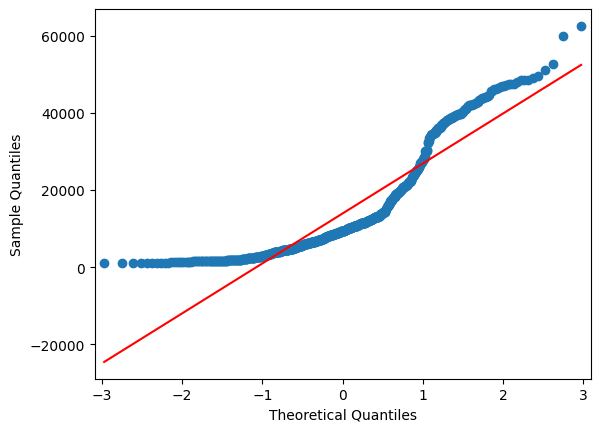

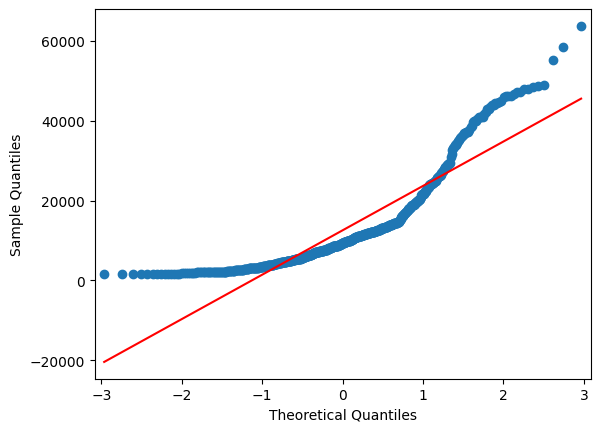

In [257]:
qqplot(male_charges, line = 's')
plt.show()
qqplot(female_charges, line = 's')
plt.show()

**6.2.2 Homogeneity of Variance**

**Using Levene's Test**:

* Setup Null and Alternate Hypothesis
* Perform Levene's test and compute p-value
* Compare p_value with significance level

**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Variance of both samples are equal
* Alternate Hypothesis (Ha): Variance of both samples are different

**STEP 2) Perform Levene's Test and Compute P-Value**


In [258]:
levene_stat, p_value = stats.levene(male_charges, female_charges)
print(f"Test Staticstics for Levene's Test: {levene_stat} and P-Value : {p_value}")

Test Staticstics for Levene's Test: 9.90925122305512 and P-Value : 0.0016808765833903443


**STEP 3) Compare P-Value with Significance Level**

In [259]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Both the sample has different Variance")
else:
    print("Failed to Reject Null Hypothesis (Ha). Both the samples have equal variance")

Reject Null Hypothesis(H0). Both the sample has different Variance


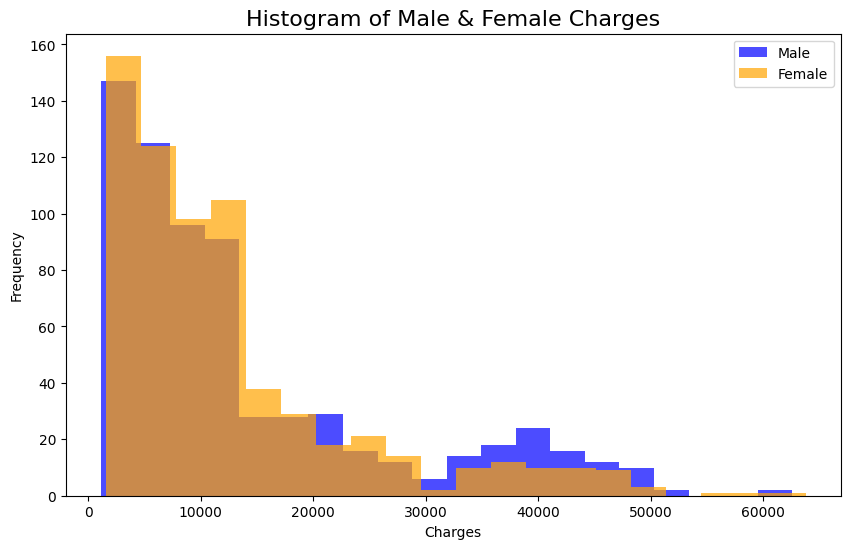

In [261]:
import matplotlib.pyplot as plt

# Histogram: Charges for males and females
plt.figure(figsize=(10, 6))
plt.hist(male_charges, bins=20, alpha=0.7, label='Male', color='blue')
plt.hist(female_charges, bins=20, alpha=0.7, label='Female', color='orange')

# Add title and labels
plt.title("Histogram of Male & Female Charges", fontsize=16)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.legend()

# Show plot
plt.show()


**6.2.3 Perform Two Sample Independent T-Test**

**Steps to be followed**:

* Setup Null and Alternate Hypothesis
* Test Distribution
* Perform Right Tail test / Left Tail test / Two tailed Test
* Perform Two Sample Independent T Test and compute P-Value
* Compare P-Value with Significance Level



In [262]:
print(f"Mean of Male: {male_charges.mean()}")
print(f"Mean of Female: {female_charges.mean()}")

Mean of Male: 13956.751177721893
Mean of Female: 12569.578843835347


**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis(H0): Means of both the samples are same
* Alternate Hypothesis(Ha): Mean of Male is more than mean of Female

**STEP 2) Test Distribution**

* Here Test Distribution is T-Distribution

**STEP 3) Perform Right Tail test / Left Tail test / Two tailed Test**

* We need to perform Right tail test

**STEP 4) Perform Two Sample Independent T-Test**


In [263]:
t_test, p_value = stats.ttest_ind(male_charges, female_charges, alternative = "greater")
print(f"Test Statistic: {t_test} and P-Value : {p_value}")

Test Statistic: 2.097546590051688 and P-Value : 0.01806636050296488


**STEP 5) Compare P-Value with Significance Level**

In [264]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Mean of Male is greater than mean of Female")
else:
    print("Failed to Reject Null Hypothesis (Ha). Means of Both samples are same")

Reject Null Hypothesis(H0). Mean of Male is greater than mean of Female


**Notes**:

Mean Charges of Male are greater than mean charges of Female

### **6.3 Checking if Children has same distribution**

In [266]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [267]:
children_0_charges = data.loc[data['children'] == 0]['charges']
children_1_charges = data.loc[data['children'] == 1]['charges']
children_2_charges = data.loc[data['children'] == 2]['charges']
children_3_charges = data.loc[data['children'] == 3]['charges']
children_4_charges = data.loc[data['children'] == 4]['charges']
children_5_charges = data.loc[data['children'] == 5]['charges']

**Assumptions of ANOVA**:

   1. Normality -> Data should be normally distributed
   2. Homogeneity of Variance -> Two sample variance should match
   3. Independence of Observations -> Observations should be independence of each other
   4. Continuous Data





**6.3.1 Normality**

**Using Shapiro-Wilk Test**:

* Setup Null and Alternate Hypothesis
* Perform Shapiro-Wilk test and compute p-value
* Compare p_value with significance level

**STEP 1): Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Data is normally distributed
* Alternate Hypothesis (Ha) : Data is not normally distributed

**STEP 2): Perform Shapiro-Wilk test and compute p-value**


In [268]:
children_0_charges_subset = children_0_charges.sample(200)
children_1_charges_subset = children_1_charges.sample(200)
children_2_charges_subset = children_2_charges.sample(200)
children_3_charges_subset = children_3_charges.sample(157)
children_4_charges_subset = children_4_charges.sample(25)
children_5_charges_subset = children_5_charges.sample(18)

children_0_charges_test_stat, children_0_charges_p_value = stats.shapiro(children_0_charges_subset)
children_1_charges_test_stat, children_1_charges_p_value = stats.shapiro(children_1_charges_subset)
children_2_charges_test_stat, children_2_charges_p_value = stats.shapiro(children_2_charges_subset)
children_3_charges_test_stat, children_3_charges_p_value = stats.shapiro(children_3_charges_subset)
children_4_charges_test_stat, children_4_charges_p_value = stats.shapiro(children_4_charges_subset)
children_5_charges_test_stat, children_5_charges_p_value = stats.shapiro(children_5_charges_subset)


print(f"Test Statistics for Children 0: {children_0_charges_test_stat} and P-Value for Children 0: {children_0_charges_p_value}")
print(f"Test Statistics for Children 1: {children_1_charges_test_stat} and P-Value for Children 1: {children_1_charges_p_value}")
print(f"Test Statistics for Children 2: {children_2_charges_test_stat} and P-Value for Children 2: {children_2_charges_p_value}")
print(f"Test Statistics for Children 3: {children_3_charges_test_stat} and P-Value for Children 3: {children_3_charges_p_value}")
print(f"Test Statistics for Children 4: {children_4_charges_test_stat} and P-Value for Children 4: {children_4_charges_p_value}")
print(f"Test Statistics for Children 5: {children_5_charges_test_stat} and P-Value for Children 5: {children_5_charges_p_value}")



Test Statistics for Children 0: 0.7538070756849493 and P-Value for Children 0: 5.603732018905984e-17
Test Statistics for Children 1: 0.7798548430175406 and P-Value for Children 1: 4.719616071398596e-16
Test Statistics for Children 2: 0.7845828972759435 and P-Value for Children 2: 7.084160433130963e-16
Test Statistics for Children 3: 0.8057757247823182 and P-Value for Children 3: 3.6351483710182234e-13
Test Statistics for Children 4: 0.8294428996291987 and P-Value for Children 4: 0.0007348773668481289
Test Statistics for Children 5: 0.8909596409938495 and P-Value for Children 5: 0.04008353911233841


**STEP 3): Compare P_Value with Significance Level**

Assume Significant level as 5%

In [269]:
alpha = 0.05
# Comparision of p_value with significance
if children_0_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Children 0 data. Children 0 data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Children 0 data. Children 0 data is normally distributed")
    
if children_1_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Children 1 data. Children 1 data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Children 1 data. Children 1 data is normally distributed")
    
if children_2_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Children 2 data. Children 2 data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Children 2 data. Children 2 data is normally distributed")
    
if children_3_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Children 3 data. Children 3 data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Children 3 data. Children 3 data is normally distributed")
    
if children_4_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Children 4 data. Children 4 data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Children 4 data. Children 4 data is normally distributed")
    
if children_5_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Children 5 data. Children 5 data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Children 5 data. Children 5 data is normally distributed")

Reject Null Hypothesis(H0) for Children 0 data. Children 0 data is not normally distributed.
Reject Null Hypothesis(H0) for Children 1 data. Children 1 data is not normally distributed.
Reject Null Hypothesis(H0) for Children 2 data. Children 2 data is not normally distributed.
Reject Null Hypothesis(H0) for Children 3 data. Children 3 data is not normally distributed.
Reject Null Hypothesis(H0) for Children 4 data. Children 4 data is not normally distributed.
Reject Null Hypothesis(H0) for Children 5 data. Children 5 data is not normally distributed.


**Using QQ Plots**

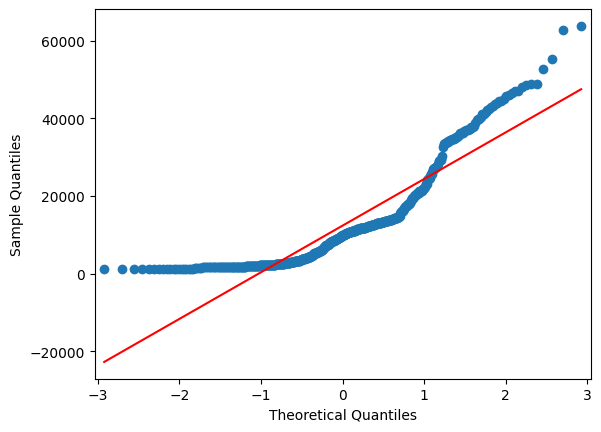

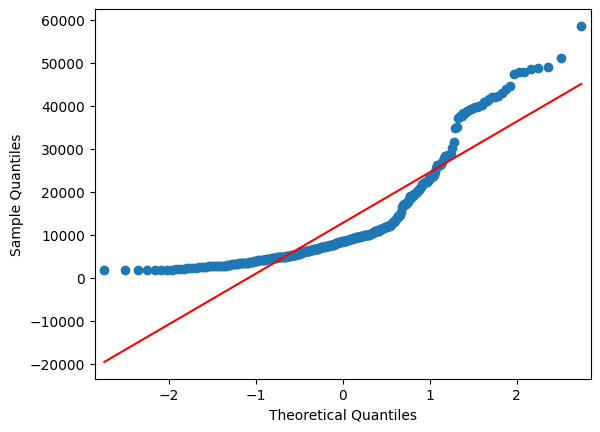

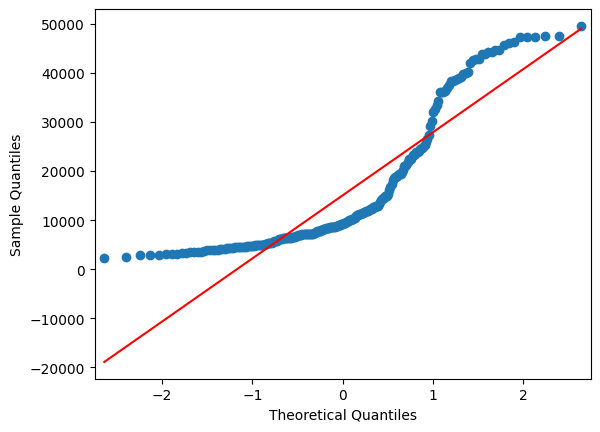

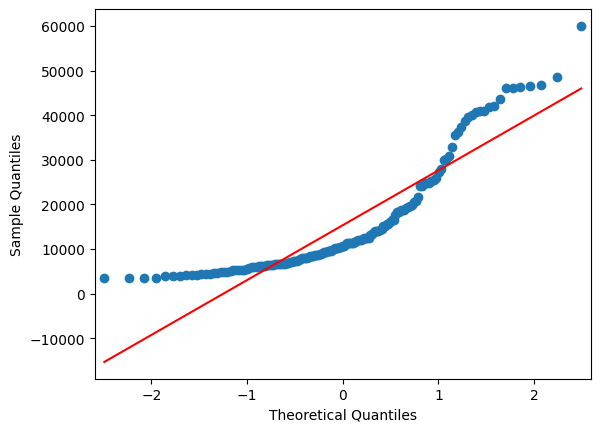

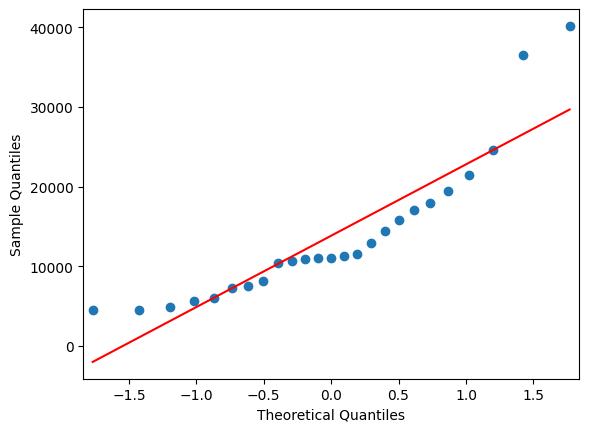

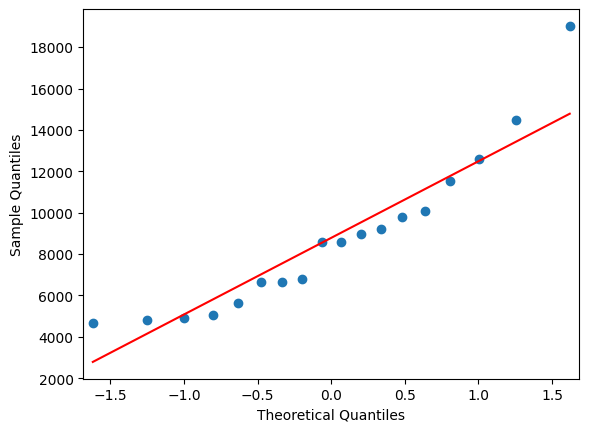

In [270]:
qqplot(children_0_charges, line = 's')
plt.show()
qqplot(children_1_charges, line = 's')
plt.show()
qqplot(children_2_charges, line = 's')
plt.show()

qqplot(children_3_charges, line = 's')
plt.show()
qqplot(children_4_charges, line = 's')
plt.show()

qqplot(children_5_charges, line = 's')
plt.show()


**6.3.2 Homogeneity of Variance**

**Using Levene's Test**:

* Setup Null and Alternate Hypothesis
* Perform Levene's test and compute p-value
* Compare p_value with significance level

**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Variance of both samples are equal
* Alternate Hypothesis (Ha): Variance of both samples are different

**STEP 2) Perform Levene's Test and Compute P-Value**


In [271]:
levene_stat, p_value = stats.levene(children_0_charges, children_1_charges, children_2_charges, children_3_charges, children_4_charges, children_5_charges)
print(f"Test Staticstics for Levene's Test: {levene_stat} and P-Value : {p_value}")

Test Staticstics for Levene's Test: 2.0832666897973087 and P-Value : 0.0649715609265261


**STEP 3) Compare P-Value with Significance Level**

In [272]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Both the sample has different Variance")
else:
    print("Failed to Reject Null Hypothesis (Ha). Both the samples have equal variance")

Failed to Reject Null Hypothesis (Ha). Both the samples have equal variance


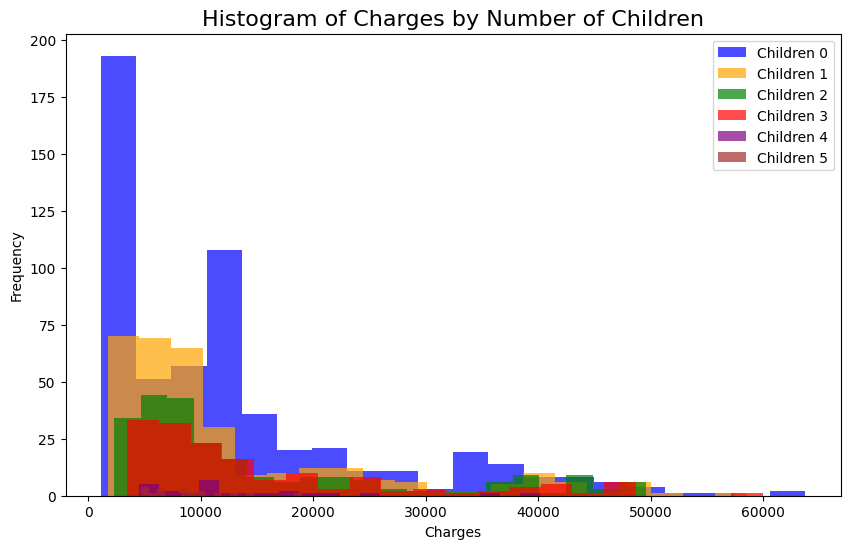

In [274]:
 import matplotlib.pyplot as plt

# List of charges for different numbers of children
charges_list = [children_0_charges, children_1_charges, children_2_charges, 
                children_3_charges, children_4_charges, children_5_charges]

# Colors and labels for each histogram
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
labels = ['Children 0', 'Children 1', 'Children 2', 'Children 3', 'Children 4', 'Children 5']

# Create a figure for the histograms
plt.figure(figsize=(10, 6))

# Plot histograms for each group with a loop
for charges, color, label in zip(charges_list, colors, labels):
    plt.hist(charges, bins=20, alpha=0.7, label=label, color=color)

# Add title and labels
plt.title("Histogram of Charges by Number of Children", fontsize=16)
plt.xlabel("Charges")
plt.ylabel("Frequency")

# Add a legend to differentiate the groups
plt.legend()

# Show the plot
plt.show()


**6.3.3 Perform ANOVA**

**Steps to be followed**:

* Setup Null and Alternate Hypothesis
* Test Distribution
* Perform Right Tail test / Left Tail test / Two tailed Test
* Perform ANOVA and compute P-Value
* Compare P-Value with Significance Level



In [275]:
print(f"Mean of 0 Children: {children_0_charges.mean()}")
print(f"Mean of 1 Children: {children_1_charges.mean()}")
print(f"Mean of 2 Children: {children_2_charges.mean()}")
print(f"Mean of 3 Children: {children_3_charges.mean()}")
print(f"Mean of 4 Children: {children_4_charges.mean()}")
print(f"Mean of 5 Children: {children_5_charges.mean()}")

Mean of 0 Children: 12365.97560163589
Mean of 1 Children: 12731.171831635802
Mean of 2 Children: 15073.563733958332
Mean of 3 Children: 15355.318366815285
Mean of 4 Children: 13850.6563112
Mean of 5 Children: 8786.035247222222


**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis(H0): Means of all groups are same
* Alternate Hypothesis(Ha): Mean of atleast one group is different

**STEP 2) Test Distribution**

* Here Test Distribution is Gaussian

**STEP 3) Perform ANOVA Test**


In [276]:
anova_test, p_value = stats.f_oneway(children_0_charges, children_1_charges, children_2_charges, children_3_charges, children_4_charges, children_5_charges)
print(f"Test Statistic: {anova_test} and P-Value : {p_value}")

Test Statistic: 3.296920166720223 and P-Value : 0.00578568138087587


**STEP 5) Compare P-Value with Significance Level**

In [277]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Mean of atleast one group is different")
else:
    print("Failed to Reject Null Hypothesis (Ha). Mean of All groups are same")

Reject Null Hypothesis(H0). Mean of atleast one group is different


**Notes**:

Means of all groups of children, 0 children, 1 children, 2 children, 3 children, 4 children, 5 children, is same

### **6.4 Checking if Smoker and Non Smoker has same distribution**

In [278]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [279]:
smoker_charges = data.loc[data['smoker'] == 'yes']['charges']
no_smoker_charges = data.loc[data['smoker'] == 'no']['charges']

**Assumptions of ANOVA**:

   1. Normality -> Data should be normally distributed
   2. Homogeneity of Variance -> Two sample variance should match
   3. Independence of Observations -> Observations should be independence of each other
   4. Continuous Data





**6.4.1 Normality**

**Using Shapiro-Wilk Test**:

* Setup Null and Alternate Hypothesis
* Perform Shapiro-Wilk test and compute p-value
* Compare p_value with significance level

**STEP 1): Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Data is normally distributed
* Alternate Hypothesis (Ha) : Data is not normally distributed

**STEP 2): Perform Shapiro-Wilk test and compute p-value**


In [280]:
smoker_charges_subset = smoker_charges.sample(200)
no_smoker_charges_subset = no_smoker_charges.sample(200)


smoker_charges_test_stat, smoker_charges_p_value = stats.shapiro(smoker_charges_subset)
no_smoker_charges_test_stat, no_smoker_charges_p_value = stats.shapiro(no_smoker_charges_subset)


print(f"Test Statistics for Smoker: {smoker_charges_test_stat} and P-Value for Smoker: {smoker_charges_p_value}")
print(f"Test Statistics for Non Smoker: {no_smoker_charges_test_stat} and P-Value for Non Smoker: {no_smoker_charges_p_value}")



Test Statistics for Smoker: 0.9331994470283548 and P-Value for Smoker: 6.115863713685841e-08
Test Statistics for Non Smoker: 0.8668982168975323 and P-Value for Non Smoker: 3.073245567686171e-12


**STEP 3): Compare P_Value with Significance Level**

Assume Significant level as 5%

In [281]:
alpha = 0.05
# Comparision of p_value with significance
if smoker_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Smoker data. Smoker data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Smoker data. Smoker data is normally distributed")
    
if no_smoker_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for Non Smoker data. Non Smoker data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for Non Smoker data. Non Smoker data is normally distributed")

Reject Null Hypothesis(H0) for Smoker data. Smoker data is not normally distributed.
Reject Null Hypothesis(H0) for Non Smoker data. Non Smoker data is not normally distributed.


**Using QQ Plots**

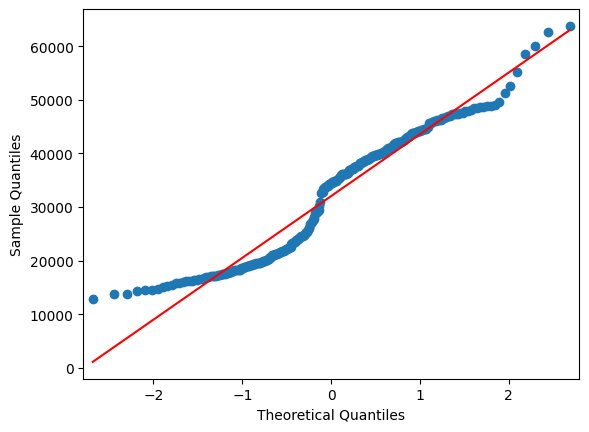

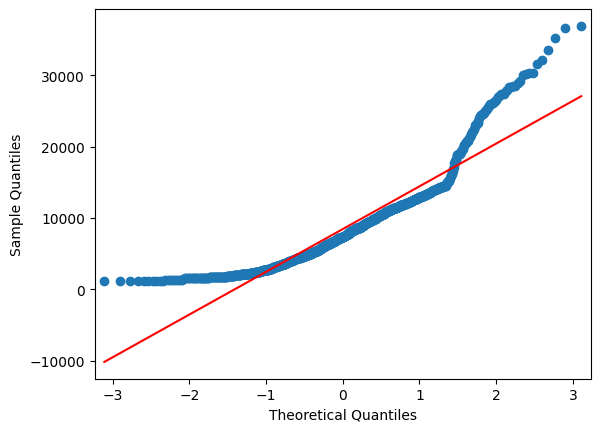

In [282]:
qqplot(smoker_charges, line = 's')
plt.show()
qqplot(no_smoker_charges, line = 's')
plt.show()



**6.4.2 Homogeneity of Variance**

**Using Levene's Test**:

* Setup Null and Alternate Hypothesis
* Perform Levene's test and compute p-value
* Compare p_value with significance level

**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Variance of both samples are equal
* Alternate Hypothesis (Ha): Variance of both samples are different

**STEP 2) Perform Levene's Test and Compute P-Value**


In [283]:
levene_stat, p_value = stats.levene(smoker_charges, no_smoker_charges)
print(f"Test Staticstics for Levene's Test: {levene_stat} and P-Value : {p_value}")

Test Staticstics for Levene's Test: 332.6135162726081 and P-Value : 1.5593284881803726e-66


**STEP 3) Compare P-Value with Significance Level**

In [284]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Both the sample has different Variance")
else:
    print("Failed to Reject Null Hypothesis (Ha). Both the samples have equal variance")

Reject Null Hypothesis(H0). Both the sample has different Variance


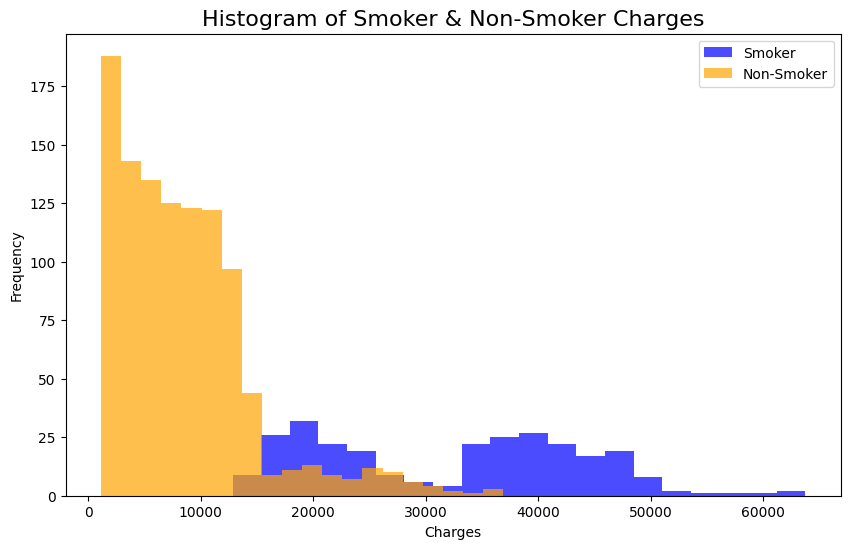

In [286]:
import matplotlib.pyplot as plt

# Plot histograms for smoker and non-smoker charges
plt.figure(figsize=(10, 6))
plt.hist(smoker_charges, bins=20, alpha=0.7, label='Smoker', color='blue')
plt.hist(no_smoker_charges, bins=20, alpha=0.7, label='Non-Smoker', color='orange')

# Add title and labels
plt.title("Histogram of Smoker & Non-Smoker Charges", fontsize=16)
plt.xlabel("Charges")
plt.ylabel("Frequency")

# Add a legend to differentiate the categories
plt.legend()

# Show the plot
plt.show()


**6.4.3 Perform ANOVA**

**Steps to be followed**:

* Setup Null and Alternate Hypothesis
* Test Distribution
* Perform Right Tail test / Left Tail test / Two tailed Test
* Perform ANOVA and compute P-Value
* Compare P-Value with Significance Level



In [287]:
print(f"Mean of Smoker: {smoker_charges.mean()}")
print(f"Mean of Non Smoker: {no_smoker_charges.mean()}")

Mean of Smoker: 32050.23183153284
Mean of Non Smoker: 8434.268297856204


**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis(H0): Means of all groups are same
* Alternate Hypothesis(Ha): Mean of atleast one group is different

**STEP 2) Test Distribution**

* Here Test Distribution is Gaussian

**STEP 3) Perform ANOVA Test**


In [288]:
anova_test, p_value = stats.f_oneway(smoker_charges, no_smoker_charges)
print(f"Test Statistic: {anova_test} and P-Value : {p_value}")

Test Statistic: 2177.614868056519 and P-Value : 8.271435842182967e-283


**STEP 5) Compare P-Value with Significance Level**

In [289]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Mean of atleast one group is different")
else:
    print("Failed to Reject Null Hypothesis (Ha). Mean of All groups are same")

Reject Null Hypothesis(H0). Mean of atleast one group is different


**Notes**:

Mean Charges of Smoker is greater than mean charges of Non Smoker

### **6.5 Checking if Region has same distribution**

In [290]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [291]:
northeast_charges = data.loc[data['region'] == 'northeast']['charges']
northwest_charges = data.loc[data['region'] == 'northwest']['charges']
southeast_charges = data.loc[data['region'] == 'southeast']['charges']
southwest_charges = data.loc[data['region'] == 'southwest']['charges']

**Assumptions of ANOVA**:

   1. Normality -> Data should be normally distributed
   2. Homogeneity of Variance -> Two sample variance should match
   3. Independence of Observations -> Observations should be independence of each other
   4. Continuous Data





**6.5.1 Normality**

**Using Shapiro-Wilk Test**:

* Setup Null and Alternate Hypothesis
* Perform Shapiro-Wilk test and compute p-value
* Compare p_value with significance level

**STEP 1): Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Data is normally distributed
* Alternate Hypothesis (Ha) : Data is not normally distributed

**STEP 2): Perform Shapiro-Wilk test and compute p-value**


In [292]:
northeast_charges_subset = northeast_charges.sample(200)
northwest_charges_subset = northwest_charges.sample(200)
southeast_charges_subset = southeast_charges.sample(200)
southwest_charges_subset = southwest_charges.sample(157)


northeast_charges_test_stat, northeast_charges_p_value = stats.shapiro(northeast_charges_subset)
northwest_charges_test_stat, northwest_charges_p_value = stats.shapiro(northwest_charges_subset)
southeast_charges_test_stat, southeast_charges_p_value = stats.shapiro(southeast_charges_subset)
southwest_charges_test_stat, southwest_charges_p_value = stats.shapiro(southwest_charges_subset)


print(f"Test Statistics for North East: {northeast_charges_test_stat} and P-Value for North East: {northeast_charges_p_value}")
print(f"Test Statistics for North West: {northwest_charges_test_stat} and P-Value for North West: {northwest_charges_p_value}")
print(f"Test Statistics for South East: {southeast_charges_test_stat} and P-Value for South East: {southeast_charges_p_value}")
print(f"Test Statistics for South West: {southwest_charges_test_stat} and P-Value for South West: {southwest_charges_p_value}")


Test Statistics for North East: 0.8379362656248553 and P-Value for North East: 1.1577075290327652e-13
Test Statistics for North West: 0.8091809338788444 and P-Value for North West: 6.541875278886126e-15
Test Statistics for South East: 0.7982083126171712 and P-Value for South East: 2.369594439217464e-15
Test Statistics for South West: 0.7891771754572433 and P-Value for South West: 9.153936781174971e-14


**STEP 3): Compare P_Value with Significance Level**

Assume Significant level as 5%

In [293]:
alpha = 0.05
# Comparision of p_value with significance
if northeast_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for North East data. North East data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for North East data. North East data is normally distributed")
    
if northwest_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for North West data. North West data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for North West data. North West data is normally distributed")
    
if southeast_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for South East data. South East data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for South East data. South East data is normally distributed")
    
if southwest_charges_p_value < alpha:
    print("Reject Null Hypothesis(H0) for South West data. South West data is not normally distributed.")
else:
    print("Failed to Reject Null Hypothesis (Ha) for South West data. South West data is normally distributed")

Reject Null Hypothesis(H0) for North East data. North East data is not normally distributed.
Reject Null Hypothesis(H0) for North West data. North West data is not normally distributed.
Reject Null Hypothesis(H0) for South East data. South East data is not normally distributed.
Reject Null Hypothesis(H0) for South West data. South West data is not normally distributed.


**Using QQ Plots**

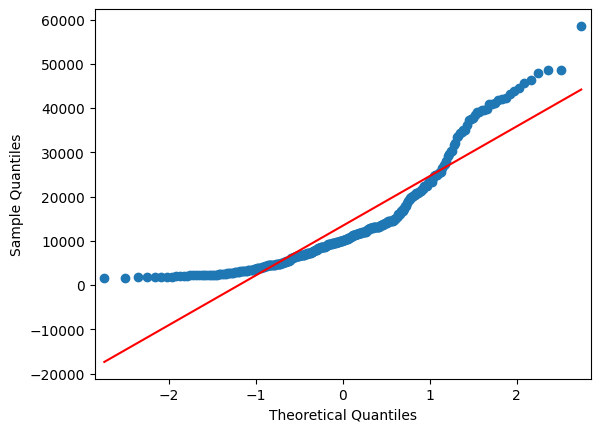

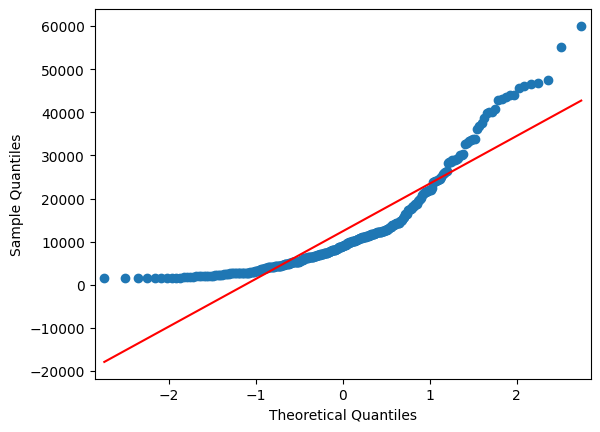

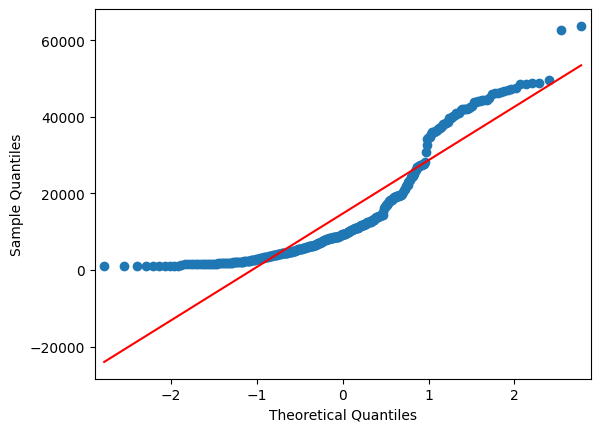

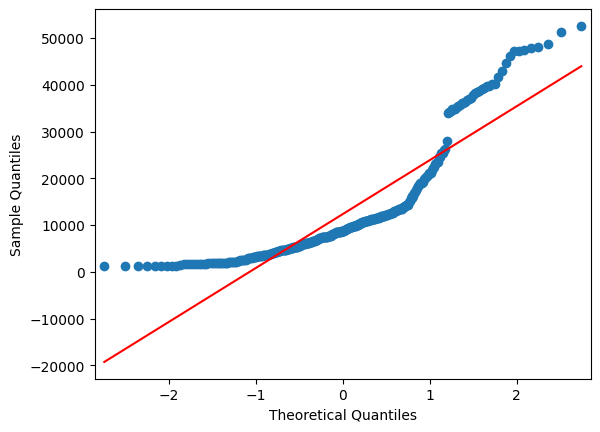

In [294]:
qqplot(northeast_charges, line = 's')
plt.show()
qqplot(northwest_charges, line = 's')
plt.show()
qqplot(southeast_charges, line = 's')
plt.show()

qqplot(southwest_charges, line = 's')
plt.show()

plt.show()


**6.5.2 Homogeneity of Variance**

**Using Levene's Test**:

* Setup Null and Alternate Hypothesis
* Perform Levene's test and compute p-value
* Compare p_value with significance level

**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis (H0): Variance of both samples are equal
* Alternate Hypothesis (Ha): Variance of both samples are different

**STEP 2) Perform Levene's Test and Compute P-Value**


In [295]:
levene_stat, p_value = stats.levene(northeast_charges, northwest_charges, southeast_charges, southwest_charges)
print(f"Test Staticstics for Levene's Test: {levene_stat} and P-Value : {p_value}")

Test Staticstics for Levene's Test: 5.559966758410606 and P-Value : 0.0008610590250786703


**STEP 3) Compare P-Value with Significance Level**

In [296]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Both the sample has different Variance")
else:
    print("Failed to Reject Null Hypothesis (Ha). Both the samples have equal variance")

Reject Null Hypothesis(H0). Both the sample has different Variance


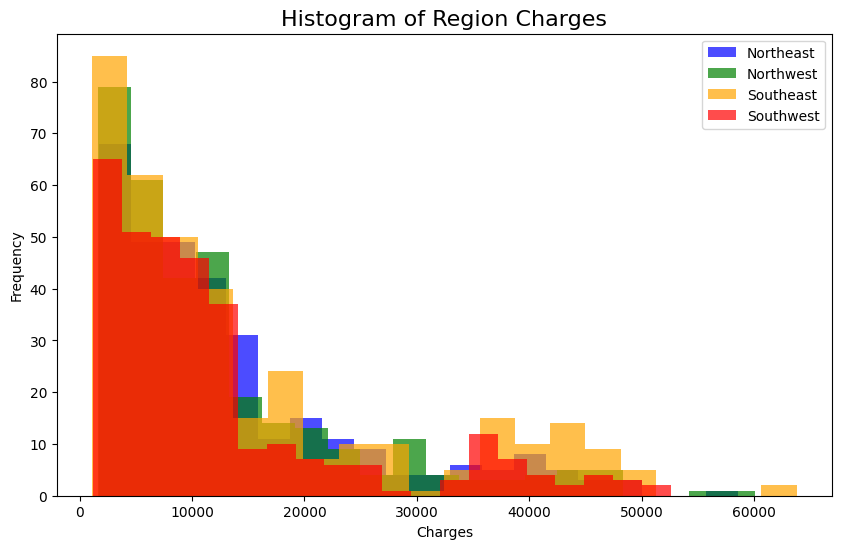

In [298]:
import matplotlib.pyplot as plt

# Plot histograms for charges in different regions
plt.figure(figsize=(10, 6))
plt.hist(northeast_charges, bins=20, alpha=0.7, label='Northeast', color='blue')
plt.hist(northwest_charges, bins=20, alpha=0.7, label='Northwest', color='green')
plt.hist(southeast_charges, bins=20, alpha=0.7, label='Southeast', color='orange')
plt.hist(southwest_charges, bins=20, alpha=0.7, label='Southwest', color='red')

# Add title and labels
plt.title("Histogram of Region Charges", fontsize=16)
plt.xlabel("Charges")
plt.ylabel("Frequency")

# Add a legend to differentiate the regions
plt.legend()

# Show the plot
plt.show()


**6.5.3 Perform ANOVA**

**Steps to be followed**:

* Setup Null and Alternate Hypothesis
* Test Distribution
* Perform Right Tail test / Left Tail test / Two tailed Test
* Perform ANOVA and compute P-Value
* Compare P-Value with Significance Level



In [299]:
print(f"Mean of North East: {northeast_charges.mean()}")
print(f"Mean of North West: {northwest_charges.mean()}")
print(f"Mean of South East: {southeast_charges.mean()}")
print(f"Mean of South West: {southwest_charges.mean()}")

Mean of North East: 13406.384516385804
Mean of North West: 12417.57537396923
Mean of South East: 14735.411437609888
Mean of South West: 12346.937377292308


**STEP 1) Setup Null and Alternate Hypothesis**

* Null Hypothesis(H0): Means of all groups are same
* Alternate Hypothesis(Ha): Mean of atleast one group is different

**STEP 2) Test Distribution**

* Here Test Distribution is Gaussian

**STEP 3) Perform ANOVA Test**


In [300]:
anova_test, p_value = stats.f_oneway(northeast_charges, northwest_charges, southeast_charges, southwest_charges, )
print(f"Test Statistic: {anova_test} and P-Value : {p_value}")

Test Statistic: 2.96962669358912 and P-Value : 0.0308933560705201


**STEP 5) Compare P-Value with Significance Level**

In [301]:
alpha = 0.05
# Comparision of p_value with significance
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Mean of atleast one group is different")
else:
    print("Failed to Reject Null Hypothesis (Ha). Mean of All groups are same")

Reject Null Hypothesis(H0). Mean of atleast one group is different


**Notes**:

Mean charges of atleast one region is different

## **Insights**:

-------------------

#### **BMI Distribution**:

**Normal Curve**: 
> The distribution of Body Mass Index (BMI) among the population follows a bell-shaped curve, suggesting a majority of individuals have a BMI within a specific range. This could indicate a relatively balanced distribution of weight in the population.

-------------------

#### **Gender and Charges**:

**Gender Gap**: 
> Men tend to have higher average healthcare charges compared to women. This could be attributed to various factors such as biological differences, lifestyle choices, or societal norms.

-------------------

#### **Age and Charges**:

**Age-Based Variation**: 
> At least one age group exhibits significantly different healthcare costs. This might suggest that certain age brackets face unique health challenges or require specific treatments that impact their expenses, expecially when age is more than 45 years of age

-------------------

#### **Smoking and Charges**:

**Smoking Toll**: 
> Smokers incur substantially higher healthcare costs on average than non-smokers. This highlights the significant health consequences associated with smoking and its impact on the healthcare system.

-------------------

#### **Region and Charges**:

**Regional Variations**: 
> At least one region experiences distinct healthcare costs. This could be due to factors such as differences in healthcare infrastructure, access to medical services, or regional variations in health conditions.

-------------------